In [201]:
# importamos las librerías que necesitamos

# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualización
# ------------------------------------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluar linealidad de las relaciones entre las variables
# y la distribución de las variables
# ------------------------------------------------------------------------------
#import scipy.stats as stats
import scipy.stats as st
import scipy.stats as stats
from scipy.stats import shapiro, poisson, chisquare, expon, kstest

# Librerias para imputar nulos
# ------------------------------------------------------------------------------
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Configuración
# -----------------------------------------------------------------------
pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames

# Gestión de los warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings("ignore")

In [202]:
df = pd.read_csv("HR RAW DATA.csv")
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NUMCOMPANIESWORKED,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TOTALWORKINGYEARS,TrainingTimesLastYear,WORKLIFEBALANCE,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,NUMBERCHILDREN,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [203]:
df.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [204]:
df.shape

(1614, 42)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1614 entries, 0 to 1613
Data columns (total 42 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1614 non-null   int64  
 1   Age                       1614 non-null   object 
 2   Attrition                 1614 non-null   object 
 3   BusinessTravel            842 non-null    object 
 4   DailyRate                 1614 non-null   object 
 5   Department                302 non-null    object 
 6   DistanceFromHome          1614 non-null   int64  
 7   Education                 1614 non-null   int64  
 8   EducationField            869 non-null    object 
 9   employeecount             1614 non-null   int64  
 10  employeenumber            1183 non-null   object 
 11  EnvironmentSatisfaction   1614 non-null   int64  
 12  Gender                    1614 non-null   int64  
 13  HourlyRate                1614 non-null   object 
 14  JobInvol

In [206]:
df.isnull().sum()

Unnamed: 0                     0
Age                            0
Attrition                      0
BusinessTravel               772
DailyRate                      0
Department                  1312
DistanceFromHome               0
Education                      0
EducationField               745
employeecount                  0
employeenumber               431
EnvironmentSatisfaction        0
Gender                         0
HourlyRate                     0
JobInvolvement                 0
JobLevel                       0
JobRole                        0
JobSatisfaction                0
MaritalStatus                651
MonthlyIncome                843
MonthlyRate                    0
NUMCOMPANIESWORKED             0
Over18                       901
OverTime                     676
PercentSalaryHike              0
PerformanceRating            195
RelationshipSatisfaction       0
StandardHours               1195
StockOptionLevel               0
TOTALWORKINGYEARS            526
TrainingTi

In [207]:
df.describe()

,Unnamed: 0,DistanceFromHome,Education,employeecount,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobSatisfaction,MonthlyRate,NUMCOMPANIESWORKED,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YEARSWITHCURRMANAGER,DateBirth,NUMBERCHILDREN
count,1614.000000,1614.000000,1614.000000,1614.0,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,1614.000000,0.0
mean,806.500000,4.527261,2.925031,1.0,4.294919,0.398389,2.739777,2.068154,2.738538,14284.495663,2.673482,15.165428,2.704461,0.791202,2.809789,7.132590,2.245973,4.220570,1986.076208,NaN
std,466.065982,14.591913,1.022357,0.0,6.993559,0.489718,0.711567,1.101344,1.106163,7110.414585,2.506152,3.648610,1.079031,0.842396,1.297765,6.124237,3.235665,3.562695,9.101332,NaN
min,0.000000,-49.000000,1.000000,1.0,1.000000,0.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1963.000000,NaN
25%,403.250000,2.000000,2.000000,1.0,2.000000,0.000000,2.000000,1.000000,2.000000,8001.000000,1.000000,12.000000,2.000000,0.000000,2.000000,3.000000,0.000000,2.000000,1980.000000,NaN
50%,806.500000,5.000000,3.000000,1.0,3.000000,0.000000,3.000000,2.000000,3.000000,14248.500000,2.000000,14.000000,3.000000,1.000000,3.000000,5.000000,1.000000,3.000000,1987.000000,NaN
75%,1209.750000,11.000000,4.000000,1.0,4.000000,1.000000,3.000000,3.000000,4.000000,20364.000000,4.000000,18.000000,4.000000,1.000000,3.000000,9.000000,3.000000,7.000000,1993.000000,NaN
max,1613.000000,29.000000,5.000000,1.0,49.000000,1.000000,4.000000,5.000000,4.000000,26999.000000,9.000000,25.000000,4.000000,3.000000,6.000000,40.000000,15.000000,17.000000,2005.000000,NaN


In [208]:
## pasos a seguir:

# igualar nombres columnas (minusculas, espacios) -- HECHO
# columnas gender remplazar por female y male -- HECHO
# revisar DailyRate porque incluye valores numéricos -- HECHO
# revisar Age para que sea numérica -- HECHO
# reviar Hourly Rate para que sea numérica -- HECHO
# revisar mMnthly income para pasar a numérico -- HECHO
# revisar Total Working Years para que sea numérica -- HECHO
# revisar job level para que sea categórica -- HECHO
# revisar Same as Monthly income para que sea numérica -- HECHO
# revisar Education pone como int y ponerla a categórica -- HECHO
# revisar marital status porque aparece "marreid" -- HECHO
# revisar Remoto Work y eligir criterio T-F o 0-1 -- HECHO
# eliminar Over18 y NUMBERCHILDREN porque son columnas que no aportan mucho -- HECHO
# eliminar columna Salary porque el dato está mal, es el mismo para todas -- HECHO
# # eliminar Employee count porque solo tiene un valor (1 para todos) -- HECHO
# revisar minimo de DistanceFromHome porque es valor negativo -- HECHO
# evaluar y eliminar nulos (standar hours, muchos nulos (75% e info absurda, solo un valor); Years In Current Role sería info
# interesante para cambiar a numérica, pero demasiado % nulos (98%)
# evaluar duplicados
# columnas redundates: "Role Department" porque es combinacion de "Department" y "job role" y además tiene casi todo nulos - HECHO


In [209]:
df.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NUMCOMPANIESWORKED', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TOTALWORKINGYEARS', 'TrainingTimesLastYear',
       'WORKLIFEBALANCE', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YEARSWITHCURRMANAGER',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'NUMBERCHILDREN', 'RemoteWork'],
      dtype='object')

In [210]:
#Renombrar columnas con un diccionario 

df = df.rename(columns={'NUMCOMPANIESWORKED': 'Num Companies Worked', 'TOTALWORKINGYEARS': 'Total Working Years', 
                        'WORKLIFEBALANCE': 'Work Life Balance', 'YEARSWITHCURRMANAGER': 'Years with Currmanager', 
                         'NUMBERCHILDREN': 'Number Children' })

In [211]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,employeecount,employeenumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,Num Companies Worked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,Total Working Years,TrainingTimesLastYear,Work Life Balance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,Years with Currmanager,SameAsMonthlyIncome,DateBirth,Salary,RoleDepartament,Number Children,RemoteWork
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [212]:
df.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'employeecount', 'employeenumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'Num Companies Worked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'Total Working Years', 'TrainingTimesLastYear',
       'Work Life Balance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'Years with Currmanager',
       'SameAsMonthlyIncome', 'DateBirth', 'Salary', 'RoleDepartament',
       'Number Children', 'RemoteWork'],
      dtype='object')

In [213]:

df = df.rename(columns={'BusinessTravel': 'Business Travel', 'DailyRate': 'Daily Rate', 'DistanceFromHome': 'Distance From Home', 
                        'EducationField': 'Education Field', 'employeecount': 'Employee Count', 'employeenumber': 'Employee Number',
                        'EnvironmentSatisfaction': 'Environment Satisfaction', 'HourlyRate': 'Hourly Rate', 'JobInvolvement': 'Job Involvement',
                        'JobLevel': 'Job Level', 'JobRole': 'Job Role', 'JobSatisfaction': 'Job Satisfaction', 'MaritalStatus': 'MaritalStatus',
                        'MonthlyIncome': 'Monthly Income', 'MonthlyRate': 'Monthly Rate', 'Over18': 'Over 18', 'OverTime': 'Over Time',
                        'PercentSalaryHike': 'Percent Salary Hike', 'PerformanceRating': 'Performance Rating', 
                        'RelationshipSatisfaction': 'Relationship Satisfaction', 'StandardHours': 'Standard Hours',
                        'StockOptionLevel': 'StockOption Level', 'TrainingTimesLastYear': 'Training Times Last Year', 
                        'YearsAtCompany': 'Years At Company', 'YearsInCurrentRole': 'Years In Current Role',
                        'YearsSinceLastPromotion': 'Years Since Last Promotion', 'SameAsMonthlyIncome': 'Same As Monthly Income',
                        'DateBirth': 'Date Birth', 'RoleDepartament': 'Role Departament', 'RemoteWork': 'Remote Work'})

In [214]:
df = df.rename(columns={'MaritalStatus': 'Marital Status'})

In [215]:
df = df.rename(columns={'StockOption Level': 'Stock Option Level'})

In [216]:
df.head()

,Unnamed: 0,Age,Attrition,Business Travel,Daily Rate,Department,Distance From Home,Education,Education Field,Employee Count,Employee Number,Environment Satisfaction,Gender,Hourly Rate,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Monthly Rate,Num Companies Worked,Over 18,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years with Currmanager,Same As Monthly Income,Date Birth,Salary,Role Departament,Number Children,Remote Work
0,0,51,No,NaN,"684,0$",NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,"699,0$",NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,"532,0$",Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,"359,0$",NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,"1319,0$",NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [217]:
# Todas las columnas renombradas con mayuscula y espacios

In [218]:
# Ahora queremos cambiar columna Age a numerica, para ello cambiamos valores 

In [219]:
df['Age'].unique()

array(['51', '52', '42', '47', '46', '48', '59', '41', '56', '38', '55',
       '40', '58', '35', '45', '33', '36', '34', 'forty-seven', '53',
       '43', '60', '32', '37', '49', '39', '50', '44', '30',
       'fifty-eight', '29', '31', '54', '57', '27', 'thirty-six', '28',
       '26', 'fifty-five', '25', 'fifty-two', 'thirty-one', '24',
       'thirty', '23', '22', '21', '20', 'twenty-six', '19',
       'thirty-seven', '18', 'thirty-two', 'twenty-four'], dtype=object)

In [220]:
# Crear un diccionario para mapear palabras a números
numeros_escritos = {'one': 1, 'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'seven': 7, 'eight': 8, 'nine': 9, 'ten': 10,
                   'eleven': 11, 'twelve': 12, 'thirteen': 13, 'fourteen': 14, 'fifteen': 15, 'sixteen': 16, 'seventeen': 17,
                   'eighteen': 18, 'nineteen': 19, 'twenty': 20, 'thirty': 30, 'forty': 40, 'fifty': 50, 'sixty': 60, 'seventy': 70,
                   'eighty': 80, 'ninety': 90}

def convertir_a_numero(valor):
    if valor.isdigit():
        return int(valor)
    else:
        try:
            partes = valor.split('-')
            if len(partes) == 2:
                decenas = numeros_escritos.get(partes[0].lower(), 0)
                unidades = numeros_escritos.get(partes[1].lower(), 0)
                return decenas + unidades
            else:
                return numeros_escritos.get(valor.lower(), 0)
        except:
            return None
        
# Aplicar la función a la columna 'Age'
df['Age'] = df['Age'].apply(convertir_a_numero)

In [221]:
#Comprobamos que ya Age ya es int

df['Age'].unique()

array([51, 52, 42, 47, 46, 48, 59, 41, 56, 38, 55, 40, 58, 35, 45, 33, 36,
       34, 53, 43, 60, 32, 37, 49, 39, 50, 44, 30, 29, 31, 54, 57, 27, 28,
       26, 25, 24, 23, 22, 21, 20, 19, 18], dtype=int64)

In [222]:
# Comprobamos ahora Daily Rate para que sea numérica

df['Daily Rate'].unique()

array(['684,0$', '699,0$', '532,0$', '359,0$', '1319,0$', '117,0$',
       '1435,0$', '635,0$', '1276,0$', '840,0$', '247,0$', '1369,0$',
       '201,0$', '1360,0$', '692,0$', '1398,0$', '286,0$', '1402,0$',
       '819,0$', '884,0$', '1238,0$', '515,0$', '1223,0$', '202,0$',
       '928,0$', '607,0$', '266,0$', '429,0$', '589,0$', 'nan$',
       '1180,0$', '1282,0$', '776,0$', '665,0$', '526,0$', '1034,0$',
       '1403,0$', '1499,0$', '580,0$', '859,0$', '263,0$', '1376,0$',
       '885,0$', '1003,0$', '1321,0$', '394,0$', '1372,0$', '1333,0$',
       '228,0$', '737,0$', '823,0$', '667,0$', '301,0$', '573,0$',
       '1329,0$', '630,0$', '1063,0$', '1017,0$', '1296,0$', '939,0$',
       '1355,0$', '1448,0$', '200,0$', '1202,0$', '404,0$', '208,0$',
       '813,0$', '465,0$', '1189,0$', '1001,0$', '1394,0$', '161,0$',
       '288,0$', '682,0$', '1354,0$', '147,0$', '119,0$', '1413,0$',
       '452,0$', '334,0$', '1132,0$', '982,0$', '480,0$', '1099,0$',
       '672,0$', '1379,0$', '58

In [223]:
# quitamos símbolo del dolar para que sea numérica

df['Daily Rate'] = df['Daily Rate'].str.replace('$', '', regex=False)
df['Daily Rate'].unique()

array(['684,0', '699,0', '532,0', '359,0', '1319,0', '117,0', '1435,0',
       '635,0', '1276,0', '840,0', '247,0', '1369,0', '201,0', '1360,0',
       '692,0', '1398,0', '286,0', '1402,0', '819,0', '884,0', '1238,0',
       '515,0', '1223,0', '202,0', '928,0', '607,0', '266,0', '429,0',
       '589,0', 'nan', '1180,0', '1282,0', '776,0', '665,0', '526,0',
       '1034,0', '1403,0', '1499,0', '580,0', '859,0', '263,0', '1376,0',
       '885,0', '1003,0', '1321,0', '394,0', '1372,0', '1333,0', '228,0',
       '737,0', '823,0', '667,0', '301,0', '573,0', '1329,0', '630,0',
       '1063,0', '1017,0', '1296,0', '939,0', '1355,0', '1448,0', '200,0',
       '1202,0', '404,0', '208,0', '813,0', '465,0', '1189,0', '1001,0',
       '1394,0', '161,0', '288,0', '682,0', '1354,0', '147,0', '119,0',
       '1413,0', '452,0', '334,0', '1132,0', '982,0', '480,0', '1099,0',
       '672,0', '1379,0', '583,0', '1492,0', '1050,0', '469,0', '237,0',
       '1440,0', '1291,0', '1157,0', '1336,0', '1224,0',

In [224]:
df['Daily Rate'] = df['Daily Rate'].str.replace(',0', '', regex=False)
df['Daily Rate'].unique()

array(['684', '699', '532', '359', '1319', '117', '1435', '635', '1276',
       '840', '247', '1369', '201', '1360', '692', '1398', '286', '1402',
       '819', '884', '1238', '515', '1223', '202', '928', '607', '266',
       '429', '589', 'nan', '1180', '1282', '776', '665', '526', '1034',
       '1403', '1499', '580', '859', '263', '1376', '885', '1003', '1321',
       '394', '1372', '1333', '228', '737', '823', '667', '301', '573',
       '1329', '630', '1063', '1017', '1296', '939', '1355', '1448',
       '200', '1202', '404', '208', '813', '465', '1189', '1001', '1394',
       '161', '288', '682', '1354', '147', '119', '1413', '452', '334',
       '1132', '982', '480', '1099', '672', '1379', '583', '1492', '1050',
       '469', '237', '1440', '1291', '1157', '1336', '1224', '735',
       '1389', '638', '1240', '194', '1339', '111', '1469', '470', '1232',
       '1249', '798', '549', '570', '541', '164', '1117', '619', '319',
       '956', '1245', '1397', '527', '213', '882', '330'

In [225]:
df['Daily Rate'] = df['Daily Rate'].str.replace("'", '', regex=False)
df['Daily Rate'].unique()

array(['684', '699', '532', '359', '1319', '117', '1435', '635', '1276',
       '840', '247', '1369', '201', '1360', '692', '1398', '286', '1402',
       '819', '884', '1238', '515', '1223', '202', '928', '607', '266',
       '429', '589', 'nan', '1180', '1282', '776', '665', '526', '1034',
       '1403', '1499', '580', '859', '263', '1376', '885', '1003', '1321',
       '394', '1372', '1333', '228', '737', '823', '667', '301', '573',
       '1329', '630', '1063', '1017', '1296', '939', '1355', '1448',
       '200', '1202', '404', '208', '813', '465', '1189', '1001', '1394',
       '161', '288', '682', '1354', '147', '119', '1413', '452', '334',
       '1132', '982', '480', '1099', '672', '1379', '583', '1492', '1050',
       '469', '237', '1440', '1291', '1157', '1336', '1224', '735',
       '1389', '638', '1240', '194', '1339', '111', '1469', '470', '1232',
       '1249', '798', '549', '570', '541', '164', '1117', '619', '319',
       '956', '1245', '1397', '527', '213', '882', '330'

In [226]:
df['Daily Rate'] = df['Daily Rate'].astype('float')
df['Daily Rate'].unique()

array([ 684.,  699.,  532.,  359., 1319.,  117., 1435.,  635., 1276.,
        840.,  247., 1369.,  201., 1360.,  692., 1398.,  286., 1402.,
        819.,  884., 1238.,  515., 1223.,  202.,  928.,  607.,  266.,
        429.,  589.,   nan, 1180., 1282.,  776.,  665.,  526., 1034.,
       1403., 1499.,  580.,  859.,  263., 1376.,  885., 1003., 1321.,
        394., 1372., 1333.,  228.,  737.,  823.,  667.,  301.,  573.,
       1329.,  630., 1063., 1017., 1296.,  939., 1355., 1448.,  200.,
       1202.,  404.,  208.,  813.,  465., 1189., 1001., 1394.,  161.,
        288.,  682., 1354.,  147.,  119., 1413.,  452.,  334., 1132.,
        982.,  480., 1099.,  672., 1379.,  583., 1492., 1050.,  469.,
        237., 1440., 1291., 1157., 1336., 1224.,  735., 1389.,  638.,
       1240.,  194., 1339.,  111., 1469.,  470., 1232., 1249.,  798.,
        549.,  570.,  541.,  164., 1117.,  619.,  319.,  956., 1245.,
       1397.,  527.,  213.,  882.,  330.,  406.,  217.,  481.,  669.,
       1465.,  685.,

In [227]:
# Comprobamos que Daily rate ya es numérica

df['Daily Rate'].dtype

dtype('float64')

In [228]:
df.head(5)

,Unnamed: 0,Age,Attrition,Business Travel,Daily Rate,Department,Distance From Home,Education,Education Field,Employee Count,Employee Number,Environment Satisfaction,Gender,Hourly Rate,Job Involvement,Job Level,Job Role,Job Satisfaction,Marital Status,Monthly Income,Monthly Rate,Num Companies Worked,Over 18,Over Time,Percent Salary Hike,Performance Rating,Relationship Satisfaction,Standard Hours,Stock Option Level,Total Working Years,Training Times Last Year,Work Life Balance,Years At Company,Years In Current Role,Years Since Last Promotion,Years with Currmanager,Same As Monthly Income,Date Birth,Salary,Role Departament,Number Children,Remote Work
0,0,51,No,NaN,684.0,NaN,6,3,NaN,1,"162,0",1,0,51,3,5,resEArch DIREcToR,3,NaN,"19537,0",6462,7,Y,No,13,"3,0",3,NaN,0,NaN,5,"3,0",20,NaN,15,15,"19537,0",1972,1000000000$,NaN,NaN,Yes
1,1,52,No,NaN,699.0,NaN,1,4,Life Sciences,1,"259,0",3,0,65,2,5,ManAGeR,3,NaN,"19999,0",5678,0,NaN,NaN,14,"3,0",1,NaN,1,"34,0",5,"3,0",33,NaN,11,9,"19999,0",1971,1000000000$,NaN,NaN,1
2,2,42,No,travel_rarely,532.0,Research & Development,4,2,Technical Degree,1,"319,0",3,0,58,3,5,ManaGER,4,Married,"19232,0",4933,1,NaN,No,11,"3,0",4,NaN,0,"22,0",3,NaN,22,NaN,11,15,"19232,0",1981,1000000000$,ManaGER - Research & Development,NaN,1
3,3,47,No,travel_rarely,359.0,NaN,2,4,Medical,1,NaN,1,1,82,3,4,ReseArCH DIrECtOr,3,Married,"17169,0",26703,3,Y,NaN,19,"3,0",2,NaN,2,NaN,2,NaN,20,NaN,5,6,"17169,0",1976,1000000000$,NaN,NaN,False
4,4,46,No,NaN,1319.0,NaN,3,3,Technical Degree,1,NaN,1,1,45,4,4,sAleS EXECUtIve,1,Divorced,NaN,7739,2,Y,No,12,"3,0",4,NaN,1,NaN,5,"3,0",19,NaN,2,8,NaN,1977,1000000000$,NaN,NaN,0


In [229]:
# Convertimos Hourly Rate en numérica
df['Hourly Rate'].unique()

array(['51', '65', '58', '82', '45', '99', '91', '64', '55', '68', '49',
       '61', '79', '31', '69', '48', '80', '74', '98', '59', '33', '56',
       '66', '57', '53', '87', '81', '84', '32', '41', '92', '47',
       'Not Available', '43', '86', '30', '42', '88', '96', '67', '62',
       '72', '78', '89', '52', '50', '90', '37', '94', '76', '60', '46',
       '83', '100', '40', '97', '54', '75', '39', '85', '63', '44', '93',
       '36', '35', '73', '71', '70', '38', '77', '95', '34'], dtype=object)

In [230]:
df['Hourly Rate'] = df['Hourly Rate'].replace('Not Available', np.nan)
df['Hourly Rate'].unique()

array(['51', '65', '58', '82', '45', '99', '91', '64', '55', '68', '49',
       '61', '79', '31', '69', '48', '80', '74', '98', '59', '33', '56',
       '66', '57', '53', '87', '81', '84', '32', '41', '92', '47', nan,
       '43', '86', '30', '42', '88', '96', '67', '62', '72', '78', '89',
       '52', '50', '90', '37', '94', '76', '60', '46', '83', '100', '40',
       '97', '54', '75', '39', '85', '63', '44', '93', '36', '35', '73',
       '71', '70', '38', '77', '95', '34'], dtype=object)

In [231]:
df['Hourly Rate'] = df['Hourly Rate'].astype('float')
df['Hourly Rate'].dtype

dtype('float64')

In [232]:
# Convertimos Monthly Total Work Years en numérica
df['Total Working Years'].unique()

array([nan, '34,0', '22,0', '28,0', '20,0', '21,0', '33,0', '40,0',
       '18,0', '25,0', '15,0', '17,0', '26,0', '16,0', '24,0', '14,0',
       '23,0', '27,0', '19,0', '11,0', '38,0', '37,0', '13,0', '12,0',
       '29,0', '10,0', '36,0', '35,0', '9,0', '31,0', '32,0', '8,0',
       '7,0', '30,0', '6,0', '5,0', '4,0', '3,0', '2,0', '1,0', '0,0'],
      dtype=object)

In [233]:
df['Total Working Years'] = df['Total Working Years'].str.replace(",", '.', regex=False)

In [234]:
df['Total Working Years'] = df['Total Working Years'].astype('float')
df['Total Working Years'].dtype

dtype('float64')

In [235]:
# Convertimos Monthly Income en numérica
df['Monthly Income'].unique()

array(['19537,0', '19999,0', '19232,0', '17169,0', nan, '17174,0',
       '16595,0', '19973,0', '13402,0', '13206,0', '19545,0', '18041,0',
       '19246,0', '10748,0', '16752,0', '6201,0', '19845,0', '4001,0',
       '10447,0', '16064,0', '3210,0', '10266,0', '10475,0', '6162,0',
       '4721,0', '4615,0', '16959,0', '10306,0', '5406,0', '5902,0',
       '10855,0', '5914,0', '6646,0', '13973,0', '13320,0', '6687,0',
       '4735,0', '13872,0', '19045,0', '16015,0', '9613,0', '11510,0',
       '4306,0', '17046,0', '5067,0', '3692,0', '19847,0', '2308,0',
       '5747,0', '10422,0', '6347,0', '2348,0', '3072,0', '12490,0',
       '8020,0', '17068,0', '8943,0', '19272,0', '5577,0', '2691,0',
       '7403,0', '8823,0', '3579,0', '17779,0', '18213,0', '13577,0',
       '19190,0', '17123,0', '19187,0', '10008,0', '7988,0', '7083,0',
       '4723,0', '3407,0', '2929,0', '12031,0', '15427,0', '5126,0',
       '9619,0', '5010,0', '19033,0', '10400,0', '2793,0', '5674,0',
       '19197,0', '841

In [236]:
df['Monthly Income'] = df['Monthly Income'].str.replace(",", '.', regex=False)

In [237]:
# Comporbamos que ya es numérica
df['Monthly Income'] = df['Monthly Income'].astype('float')
df['Monthly Income'].dtype

dtype('float64')

In [238]:
# Convertimos Same as Monthly Income en numérica
df['Same As Monthly Income'].unique()

array(['19537,0', '19999,0', '19232,0', '17169,0', nan, '17174,0',
       '16595,0', '19973,0', '13402,0', '13206,0', '19545,0', '18041,0',
       '19246,0', '10748,0', '16752,0', '6201,0', '19845,0', '4001,0',
       '10447,0', '16064,0', '3210,0', '10266,0', '10475,0', '6162,0',
       '4721,0', '4615,0', '16959,0', '10306,0', '5406,0', '5902,0',
       '10855,0', '5914,0', '6646,0', '13973,0', '13320,0', '6687,0',
       '4735,0', '13872,0', '19045,0', '16015,0', '9613,0', '11510,0',
       '4306,0', '17046,0', '5067,0', '3692,0', '19847,0', '2308,0',
       '5747,0', '10422,0', '6347,0', '2348,0', '3072,0', '12490,0',
       '8020,0', '17068,0', '8943,0', '19272,0', '5577,0', '2691,0',
       '7403,0', '8823,0', '3579,0', '17779,0', '18213,0', '13577,0',
       '19190,0', '17123,0', '19187,0', '10008,0', '7988,0', '7083,0',
       '4723,0', '3407,0', '2929,0', '12031,0', '15427,0', '5126,0',
       '9619,0', '5010,0', '19033,0', '10400,0', '2793,0', '5674,0',
       '19197,0', '841

In [239]:
df['Same As Monthly Income'] = df['Same As Monthly Income'].str.replace(",", '.', regex=False)

In [240]:
df['Same As Monthly Income'] = df['Same As Monthly Income'].astype('float')
df['Same As Monthly Income'].dtype

dtype('float64')

In [241]:
# Convertir Job level a categórica
df['Job Level'] = df['Job Level'].astype('object')
df['Job Level'].dtype

dtype('O')

In [242]:
# Convertir Education a categórica
df['Education'] = df['Education'].astype('object')
df['Education'].dtype

dtype('O')

In [250]:
# en la columna Gender cambiamos valores, consideramos hombre=0 y mujer=1

df['Gender'] = df['Gender'].replace({0: 'hombre', 1: 'mujer'})
df['Gender'].unique()

array(['hombre', 'mujer'], dtype=object)

In [244]:
# En columna Marital Status reemmplazar valor "marreid"

df['Marital Status'] = df['Marital Status'].str.replace("Marreid", 'Married', regex=False)

In [245]:
# Antes de cambiar el valor 

df['Marital Status'].unique()

array([nan, 'Married', 'Divorced', 'Single', 'divorced'], dtype=object)

In [246]:
df['Marital Status'].unique()

array([nan, 'Married', 'Divorced', 'Single', 'divorced'], dtype=object)

In [251]:
#  en la columna Remoto cambiamos valores, consideramos hombre=0 y mujer=1
df['Remote Work'].unique()

array(['Yes', '1', 'False', '0', 'True'], dtype=object)

In [254]:
df['Remote Work'] = df['Remote Work'].replace({'Yes': 'YES', '1': 'YES', 'False': 'NO', '0': 'NO', 'True': 'YES'})

In [255]:
df['Remote Work'].unique()

array(['YES', 'NO'], dtype=object)

In [257]:
# Ahora revisamos columnas redundantes o con info escasa: "Over 18", "Number Children", "Salary"
# Antes de eliminar columnas, hacemos copia para seguir trabajando con la copia del df

df2 = df.copy()

In [260]:
df2.drop(columns = ['Over 18', 'Number Children', 'Salary'], inplace = True)

KeyError: "['Over 18', 'Number Children', 'Salary'] not found in axis"

In [264]:
# Explicacion de por que elminamos cada una:

# "Over 18" porque entiendo que no aporta información
# "Number Children" porque todos los datos son nulos
# "Salary" porque solo tiene un dato y es erroneo

In [263]:
df2.drop(columns = ['Employee Count'], inplace = True)

In [265]:
df2.shape

(1614, 38)

In [270]:
df.columns

Index(['Unnamed: 0', 'Age', 'Attrition', 'Business Travel', 'Daily Rate',
       'Department', 'Distance From Home', 'Education', 'Education Field',
       'Employee Count', 'Employee Number', 'Environment Satisfaction',
       'Gender', 'Hourly Rate', 'Job Involvement', 'Job Level', 'Job Role',
       'Job Satisfaction', 'Marital Status', 'Monthly Income', 'Monthly Rate',
       'Num Companies Worked', 'Over 18', 'Over Time', 'Percent Salary Hike',
       'Performance Rating', 'Relationship Satisfaction', 'Standard Hours',
       'Stock Option Level', 'Total Working Years', 'Training Times Last Year',
       'Work Life Balance', 'Years At Company', 'Years In Current Role',
       'Years Since Last Promotion', 'Years with Currmanager',
       'Same As Monthly Income', 'Date Birth', 'Salary', 'Role Departament',
       'Number Children', 'Remote Work'],
      dtype='object')

In [271]:
# Revisamos role Department porque es una combinación de Department y Job Role
# La eliminamos porque además tiene casi todos los datos nulos

df2.drop(columns = ['Role Departament'], inplace = True)

In [272]:
df2.shape

(1614, 37)

In [273]:
# revisar minimo de DistanceFromHome porque es valor negativo 

df2['Distance From Home'].min()

-49

In [288]:
df2_menor_0 = df2[df2['Distance From Home'] < 0]
df2_menor_0['Distance From Home'].value_counts()

Distance From Home
-13    11
-24    11
-12    11
-18     8
-38     7
-35     7
-47     7
-14     6
-42     6
-36     6
-19     6
-25     6
-31     6
-26     6
-48     5
-46     5
-22     5
-16     5
-10     5
-45     5
-32     4
-20     4
-37     4
-41     4
-29     4
-30     4
-27     4
-23     3
-11     3
-33     3
-15     3
-17     3
-44     3
-28     2
-34     2
-49     2
-21     2
-43     2
-39     1
-40     1
Name: count, dtype: int64

In [290]:
df2_mayor_0 = df2[df2['Distance From Home'] > 0]
df2_mayor_0['Distance From Home'].value_counts()

Distance From Home
2     217
1     203
10     86
9      85
8      81
7      80
3      79
5      62
6      61
4      61
16     30
11     28
15     27
23     26
29     25
25     24
24     24
26     22
18     22
14     21
12     21
17     19
21     19
13     19
20     18
28     17
22     16
19     16
27     13
Name: count, dtype: int64

In [291]:
df2_menor_0.shape

(192, 37)

In [293]:
df2_mayor_0.shape

(1422, 37)

In [294]:
df2.shape

(1614, 37)

In [292]:
df_porcentaje_distancia_negativa = df2_menor_0.shape[0]*100/(df2_menor_0.shape[0] + df2_mayor_0.shape[0])
df_porcentaje_distancia_negativa

11.895910780669144

In [ ]:
# Interpretacion: los datos negativos (erroneos) suponen casi un 12% del total de datos, por lo que los convertimos a nulos
# para poder tratarlos

In [297]:
df['Distance From Home'] = np.where(df['Distance From Home'] < 0, np.nan, df['Distance From Home'])

In [300]:
df['Distance From Home'].min()

1.0

In [301]:
df['Distance From Home'].isnull().sum()

192

In [302]:
# Revisamos nulos

df2.isnull().sum()

Unnamed: 0                       0
Age                              0
Attrition                        0
Business Travel                772
Daily Rate                     124
Department                    1312
Distance From Home               0
Education                        0
Education Field                745
Employee Number                431
Environment Satisfaction         0
Gender                           0
Hourly Rate                     84
Job Involvement                  0
Job Level                        0
Job Role                         0
Job Satisfaction                 0
Marital Status                 651
Monthly Income                 843
Monthly Rate                     0
Num Companies Worked             0
Over Time                      676
Percent Salary Hike              0
Performance Rating             195
Relationship Satisfaction        0
Standard Hours                1195
Stock Option Level               0
Total Working Years            526
Training Times Last 

In [306]:
df2.isnull().sum()/df2.shape[0]*100

Unnamed: 0                     0.000000
Age                            0.000000
Attrition                      0.000000
Business Travel               47.831475
Daily Rate                     7.682776
Department                    81.288724
Distance From Home             0.000000
Education                      0.000000
Education Field               46.158612
Employee Number               26.703841
Environment Satisfaction       0.000000
Gender                         0.000000
Hourly Rate                    5.204461
Job Involvement                0.000000
Job Level                      0.000000
Job Role                       0.000000
Job Satisfaction               0.000000
Marital Status                40.334572
Monthly Income                52.230483
Monthly Rate                   0.000000
Num Companies Worked           0.000000
Over Time                     41.883519
Percent Salary Hike            0.000000
Performance Rating            12.081784
Relationship Satisfaction      0.000000


In [308]:
# Estrategias a seguir:

# primero eliminamos columnas con alto % nulos porque además no tienen info muy relevante: Years In Current Role, 
# Department y Standard Hours 

df2.drop(columns = ['Years In Current Role', 'Department', 'Standard Hours'], inplace = True)

In [310]:
nulos = df2.isnull().sum()/df2.shape[0]*100
nulos.sort_values(ascending=False)

Monthly Income                52.230483
Same As Monthly Income        52.230483
Business Travel               47.831475
Education Field               46.158612
Over Time                     41.883519
Marital Status                40.334572
Total Working Years           32.589839
Employee Number               26.703841
Performance Rating            12.081784
Daily Rate                     7.682776
Work Life Balance              6.691450
Hourly Rate                    5.204461
Relationship Satisfaction      0.000000
Stock Option Level             0.000000
Years At Company               0.000000
Training Times Last Year       0.000000
Years Since Last Promotion     0.000000
Years with Currmanager         0.000000
Date Birth                     0.000000
Percent Salary Hike            0.000000
Unnamed: 0                     0.000000
Num Companies Worked           0.000000
Monthly Rate                   0.000000
Age                            0.000000
Job Satisfaction               0.000000


In [311]:
nulos = nulos[nulos > 0]
nulos.sort_values(ascending=False)

Monthly Income            52.230483
Same As Monthly Income    52.230483
Business Travel           47.831475
Education Field           46.158612
Over Time                 41.883519
Marital Status            40.334572
Total Working Years       32.589839
Employee Number           26.703841
Performance Rating        12.081784
Daily Rate                 7.682776
Work Life Balance          6.691450
Hourly Rate                5.204461
dtype: float64

In [312]:
nulos = nulos.to_frame(name='perc_nulos').reset_index().rename(columns={'index': 'var'})
nulos

,var,perc_nulos
0,Business Travel,47.831475
1,Daily Rate,7.682776
2,Education Field,46.158612
3,Employee Number,26.703841
4,Hourly Rate,5.204461
5,Marital Status,40.334572
6,Monthly Income,52.230483
7,Over Time,41.883519
8,Performance Rating,12.081784
9,Total Working Years,32.589839


In [313]:
# ahora vemos cuales son categóricas y cuales numéricas y estrategia a seguir

# Pasos para trabajar con categoricas

# 1. Quiero ver los datos del df de las variables categóricas con nulos
columnas_objeto = df2.select_dtypes(include=['object']).columns
columnas_nulos = nulos['var'].to_list()
columnas_comunes_objeto_nulos = columnas_objeto.intersection(columnas_nulos)
columnas_comunes_objeto_nulos 

# 2. # Miramos la proporción de valores entre cada categoría de las variables categóricas.
for col in columnas_comunes_objeto_nulos:
    print(f"La distribución de las categorías para la columna", col)
    display(df2[col].value_counts() / df2.shape[0])  # display es una función utilizada para mostrar objetos de manera más legible en Jupyter Notebooks o entornos similares. 
    print("........................")

# 3. Aplicamos estrategias a seguir

La distribución de las categorías para la columna Business Travel


Business Travel
travel_rarely        0.363073
travel_frequently    0.102230
non-travel           0.056382
Name: count, dtype: float64

........................
La distribución de las categorías para la columna Education Field


Education Field
Life Sciences       0.216233
Medical             0.171004
Marketing           0.064436
Technical Degree    0.042751
Other               0.036555
Human Resources     0.007435
Name: count, dtype: float64

........................
La distribución de las categorías para la columna Employee Number


Employee Number
482,0     0.001239
530,0     0.001239
507,0     0.001239
517,0     0.001239
522,0     0.001239
            ...   
161,0     0.000620
164,0     0.000620
190,0     0.000620
194,0     0.000620
2040,0    0.000620
Name: count, Length: 1079, dtype: float64

........................
La distribución de las categorías para la columna Marital Status


Marital Status
Married     0.271995
Single      0.201363
Divorced    0.116481
divorced    0.006815
Name: count, dtype: float64

........................
La distribución de las categorías para la columna Over Time


Over Time
No     0.422553
Yes    0.158612
Name: count, dtype: float64

........................
La distribución de las categorías para la columna Performance Rating


Performance Rating
3,0    0.746592
4,0    0.132590
Name: count, dtype: float64

........................
La distribución de las categorías para la columna Work Life Balance


Work Life Balance
3,0    0.565675
2,0    0.222429
4,0    0.096035
1,0    0.048947
Name: count, dtype: float64

........................


In [315]:
nulos

,var,perc_nulos
0,Business Travel,47.831475
1,Daily Rate,7.682776
2,Education Field,46.158612
3,Employee Number,26.703841
4,Hourly Rate,5.204461
5,Marital Status,40.334572
6,Monthly Income,52.230483
7,Over Time,41.883519
8,Performance Rating,12.081784
9,Total Working Years,32.589839


In [ ]:
# ESTRATEGIAS A SEGUIR CON CATEGÓRICAS

% alto NULOS: imputacion tecnicas avanzadas
- bussines travel
- education field 
- employee number? 
- Marital Status
- Over Time,

% BAJO NULOS: 
- Performance Rating --> categoria dominante --> MODA
- Work Life Balance --> catgeoria dominante --> MODA

In [ ]:
# Antes de empezar con numércias, eliminamos Same as Monthly Income, porque nos damos cuenta que son los mismos datos

df2.drop(columns = ['Same As Monthly Income'], inplace = True)

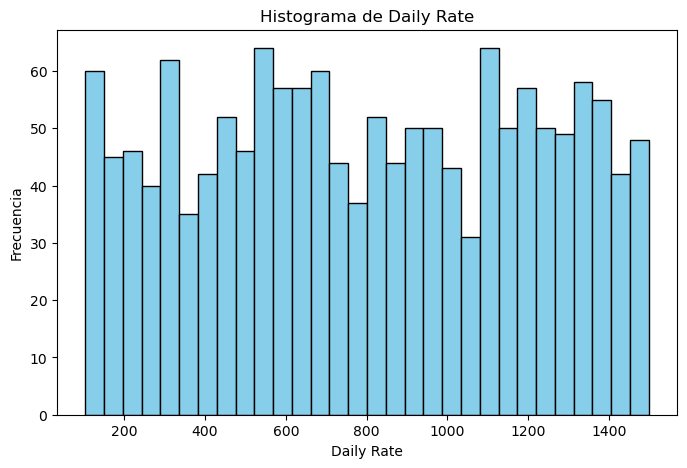

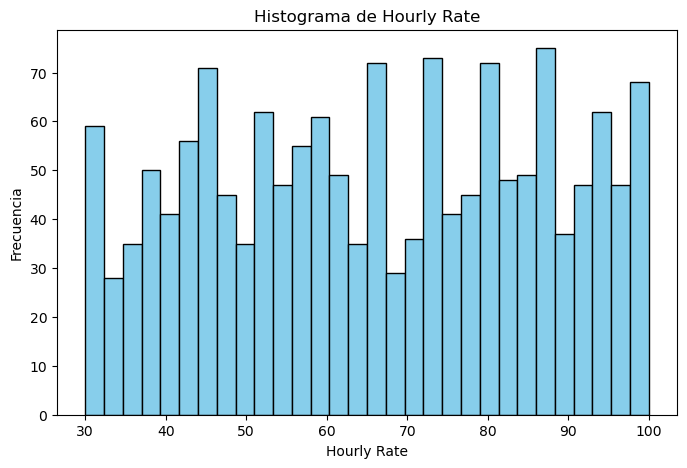

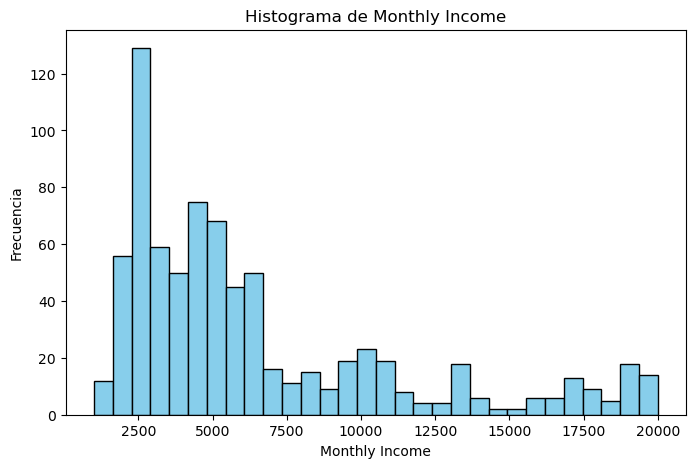

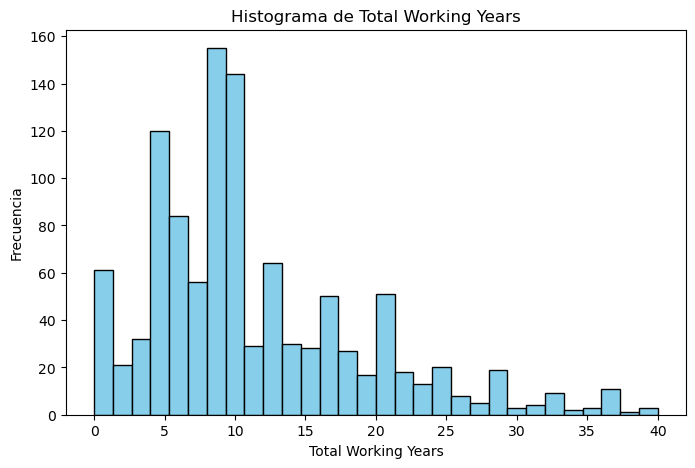

In [320]:
#Vamos con las NUMERICAS

# 1. Quiero ver los datos del df de las variables numéricas con nulos
columnas_numero = df2.select_dtypes(include=['number']).columns
columnas_nulos = nulos['var'].to_list()
columnas_comunes_numero_nulos = columnas_numero.intersection(columnas_nulos)
columnas_comunes_numero_nulos  

# 2. En lugar de ver la distribución de categorías, vemos la distribución de valores.

import matplotlib.pyplot as plt

# Lista de columnas para las que quieres hacer histogramas

# Crear un histograma separado para cada columna
for col in list(columnas_comunes_numero_nulos):
    plt.figure(figsize=(8, 5))
    plt.hist(df2[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.show()

In [317]:
nulos

,var,perc_nulos
0,Business Travel,47.831475
1,Daily Rate,7.682776
2,Education Field,46.158612
3,Employee Number,26.703841
4,Hourly Rate,5.204461
5,Marital Status,40.334572
6,Monthly Income,52.230483
7,Over Time,41.883519
8,Performance Rating,12.081784
9,Total Working Years,32.589839


In [ ]:
# ESTRATEGIAS a seguir con NUMÉRICAS

BAJO% nulos
- Daily Rate --> no simetrica
- Hourly Rate -- > no simetrica

ALTO % nulos
- Monthly Income --> tecnicas avanzadas
- Total Working Years --> tecnicas avanzadas

In [321]:
# Imputamos nulos en categoricas:

# primero moda
columnas_moda = ['Performance Rating', 'Work Life Balance']
for col in columnas_moda:
    moda = df2[col].mode()[0]
    df2[col] = df2[col].fillna(moda)

In [335]:
imputer = IterativeImputer(max_iter = 20, random_state = 42)
df2['Over Time'] = imputer.fit_transform(df2[['Over Time']])

ValueError: could not convert string to float: 'No'

In [337]:
imputer_knn = KNNImputer(n_neighbors= 2)
df2['Over Time'] = imputer_knn.fit_transform(df2['Over Time'])

ValueError: could not convert string to float: 'No'

In [ ]:
# luego tecnicas avanzadas

columnas_tecnicas_avanzadas = ['Marital Status', 'Over Time', 'Bussines Travel', 'Education Field']

for col in columnas_tecnicas_avanzadas:
    imputer = IterativeImputer(max_iter = 20, random_state = 42)
    df2[col] = imputer.fit_transform(df[[col]])

ValueError: could not convert string to float: 'Married'

In [ ]:
# employee number? decidimos no imputarla con Tecnicas avanzadas, aunque sería la estrategía a seguir, porque cada valor son 
# numeros únicos y no tiene sentido
